It is commonly accepted that an effectiveness factor of 99% can be approximated as reaction rate controlled, while a Thiele modulus of 20 represents complete internal mass transfer control where the apparent rate is inverse proportional to the catalyst effective diameter. It is further accepted that for a Thiele modulus bigger than 20, one
can obtain the apparent rate constant at higher temperatures by extrapolating with a value half that of the activation energy, while for effectiveness factors bigger than 99% one can obtain the true rate constant at lower temperatures by extrapolating with the activation energy. To approximate the area between internal mass transfer control and reaction rate control, the above extrapolations are sometimes performed in the reverse direction to obtain an intersection point (at a specific temperature) where the activation energy line on an Arrhenius plot takes a sudden ‘bend’. This approximation is not completely correct. We are interested in quantifying the error of this approximation for a first order reaction with the following properties.

<img src="Tut5.4 data.JPG" width="600" />

In [619]:
from numpy import *
from scipy.optimize import fsolve
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
%matplotlib inline

In [620]:
De     =   4e-9 #m2/s - doesn't vary with T
dp     = 2/1000 #m
Rp     =   dp/2 #m
rhocat =   2000 #kg/m3
Ea     =  80000 #J/mol
ki25   =  3e-7
ko     =  ki25/(exp(-Ea/(R*298.15))) #m3/(kg.s) first order
R      =  8.314 #J/mol.K
ko

31138288.867490347

\begin{equation}
k_{i}^{'} = k_{o}^{'}e^{(-\dfrac{E}{RT})}
\end{equation}

Mass based rate:
\begin{equation}
-r_{A}^{'}= \dfrac{1}{\rho_{cat}^{0.5}}\left(\dfrac{3}{R}\right)\left(\dfrac{2D_{e}}{n+1}\right)^{\dfrac{1}{2}}(k^{'})^{\dfrac{1}{2}}C_{A_{s}}^{\dfrac{n+1}{2}}\nonumber
\end{equation}

Apparent rate:
\begin{equation}
k_{app}^{'}=\dfrac{1}{\rho_{cat}^{0.5}}\left(\dfrac{3}{R}\right)\left(\dfrac{2D_{e}}{n+1}\right)^{\dfrac{1}{2}}(k^{'})^{\dfrac{1}{2}}\nonumber 
\end{equation}

Apparent rate expanded:
\begin{equation}
k_{app}^{'}=\dfrac{1}{\rho_{cat}^{0.5}}\left(\dfrac{3}{R}\right)\left(\dfrac{2D_{e}}{n+1}\right)^{\dfrac{1}{2}}(k_{0}^{'}e^{-\dfrac{Ea}{RT}})^{\dfrac{1}{2}}\nonumber 
\end{equation}

\begin{equation}
n_{app} =\dfrac{n+1}{2}\nonumber 
\end{equation}

\begin{equation}
\therefore -r_{A}^{'} =k_{app}^{'}C_{A_{s}}^{n_{app}} \nonumber
\end{equation}

\begin{equation}
k_{app}^{'} = k_{0_{app}}^{'}e^{-\dfrac{Ea}{2}(\dfrac{1}{RT})} \nonumber
\end{equation}

Therefore:
\begin{equation}
k_{0_{app}}^{'} = \dfrac{1}{\rho_{cat}^{0.5}}\left(\dfrac{3}{R}\right)\left(\dfrac{2D_{e}}{n+1}\right)^{\dfrac{1}{2}}(k_{0}^{'})^{\dfrac{1}{2}}\nonumber 
\end{equation}

First Order Thiele Modulus:
\begin{equation}
\phi_1^2=\frac{k_i'\rho_cR^2}{D_e}
\end{equation}

First order effectiveness equation:
\begin{equation}
\eta=\frac{3}{\phi_1^2}\left(\phi_1\coth\phi_1-1\right)
\end{equation}

**a) Plot the above description on an Arrhenius plot and show the region where the extrapolation is not entirely correct**

In [658]:
Tspan = linspace(250,1000,1000)
Tplot = 1/Tspan
n     = 1
koapp = (1/(rhocat**0.5))*(3/Rp)*((2*De/(n+1))**0.5)*(ko**0.5)

In [659]:
phi = ((ko*exp(-Ea/(R*Tspan)))*rhocat*(Rp**2))**0.5
eta = 3/phi**2*((phi*1/tanh(phi))-1)


In [660]:
ki   = ko*exp(-Ea/(R*Tspan))
Y25  = (-Ea/R)*(1/Tspan) + log(ko)
Yapp = (-Ea/(2*R))*(1/Tspan) + log(koapp)
#Yact = (-Ea/(R))*(1/Tspan) + log(koapp) + log(eta)

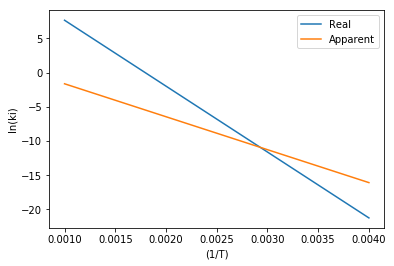

In [661]:
plt.plot(Tplot, Y25,'-', label = 'Real')
plt.plot(Tplot, Yapp,'-', label = 'Apparent')
#plt.plot(Tplot, Yact,'-', label = 'Actual')
#plt.axis([0,500, 0, 1.5])
plt.legend(loc='best')
plt.ylabel("ln(ki)")
plt.xlabel("(1/T)")
plt.show()

In [625]:
def FOphi (k,rhocat,dp,De): #first order Thiele Modulus
    R   = dp/2
    phi = (k*rhocat*R**2/De)**0.5  
    return phi

In [626]:
def FOeta (phi): #first order Effectiveness
    eta = 3/phi**2*((phi*1/tanh(phi))-1)
    return eta

In [627]:
def true(Tspan):
    lnk = -Ea/(R*Tspan) + log(ko)
    return lnk

In [628]:
def assum(Tspan):
    phi    = 20
    eta    = FOeta(phi)
    keff   = eta*true(Tspan)
    lnkeff = log(keff)
    return lnkeff 

In [629]:
def measured(Tspan):
    phi    = FOphi(ko,rhocat,dp,De)
    eta    = FOeta(phi)
    keff   = eta*true(Tspan)
    lnkeff = log(keff)
    return lnkeff

In [630]:
k1   = exp(true(421.94))
phi  = FOphi(k1,rhocat,dp,De)
eta  = FOeta(phi)
keff = eta*k1
print(keff, k1)

0.0002583930354073864 0.0038835376206628573


**b) What is the effectiveness factor at 25°C?** ($\eta = 0.99$)

In [631]:
phi = (ki25*rhocat*Rp**2/De)**0.5
phi

0.38729833462074165

In [632]:
eta = 3*((phi/tanh(phi))-1)/(phi**2)
print(str(eta))

0.9901407462675496


**c) Above what temperature can one assume that complete internal mass transfer controls the reaction rate?** ($T = 121^{\circ}C$)

Complete internal mass transfer controls the reaction rate for first order reactions when $\phi_{1} > 20$ and consequently a shortcut can be used: $\eta = \dfrac{3}{\phi_{1}}$

In [633]:
phi20 = 20

Rearranging the Thiele Modulus equation:
\begin{align}
\phi_n^2&=\frac{k_i'\rho_cR^2C_{As}^{n-1}}{D_e}\\
k_{i}^{'}&= \dfrac{\phi_{1}^{2}D_{e}}{\rho_{C}R^{2}}
\end{align}

In [634]:
ki20 = De*(phi20**2)/(rhocat*Rp**2)
ki20

0.0008

In [635]:
T20 = -Ea/(R*log(ki20/ko))
T20

394.60258057208466

In [636]:
print('T = '+str(T20-273.15)+' deg C')

T = 121.45258057208468 deg C


**d) For the specific system, by how much is the rate constant over-predicted/ under-predicted at the ‘intersection’ or ‘bend’ temperature if the sudden slope change
method (discussed above) is used?**
($k_{app~estimate} = 1.644 \times 10^{−5}~m^{3}/(kg.s) = 1.45 \times k_{app~real}$ )

We first need to determine to regression lines, one where $\eta \approx 1$ (which we already have from question b) above. Then you determine a regression line for where you know internal mass transfer controls the rate such as where $\phi = 20$. 
Calculate the temperature and apparent rate where these two lines intersects. Calculate $\eta$ in order to get the real rate and from there the ratio between the two can be obtained.

In [637]:
n      = 1
kapp20 = (1/rhocat**0.5)*(3/Rp)*((2*De/(n+1))**0.5)*(ki20**0.5)
kapp20

0.00011999999999999999

In [638]:
Y1 = log(ki25)
Y2 = log(kapp20)

In [639]:
X1 = 1/298.15
X2 = 1/T20

In [640]:
m1 = -Ea/(R)
m2 = -Ea/(2*R)

In [641]:
C1 = Y1 - m1*X1
C2 = Y2 - m2*X2

In [642]:
#intersection:
#C1 + m1X = C2 + m2X
X = (C2 - C1)/(m1 - m2)
Tx = 1/X
Tx

341.4703817566001

In [643]:
kx = exp((m2*X) + C2)
kx

1.800000000000002e-05

In [644]:
phix = (kx*rhocat*Rp**2/De)**0.5
phix

3.0000000000000013

In [645]:
etax = FOeta(phix)
print(str(etax))

0.6716364899803559


In [646]:
kreal = etax*kx
kreal

1.208945681964642e-05

In [647]:
ratio = kx/kreal
ratio

1.48890064032889

In [648]:
print('kapp_est= '+str(kx)+' m3/(kg.s) = '+str(ratio)+' X kapp_real')

kapp_est= 1.800000000000002e-05 m3/(kg.s) = 1.48890064032889 X kapp_real
